<a href="https://colab.research.google.com/github/aluvala-nikhil/SER/blob/main/SER_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing Tensorflow

In [ ]:
!pip install tensorflow

In [ ]:
!pip install --upgrade tensorflow

Installing required libraries

In [ ]:
!pip install python_speech_features
!pip install resampy
!pip install scipy
!pip install gdown
!pip install tqdm -U
!pip install soundfile
!pip install noisereduce
!pip install wave
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio
!pip install python_speech_features
!pip install wavio

Importing requried libraries

In [ ]:
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import os, glob, pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
import librosa
get_ipython().magic('matplotlib inline')
import soundfile
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, LSTM
from keras.layers import Dropout,Dense,TimeDistributed
from keras.models import Sequential
from keras.utils import to_categorical 
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Appending the dataset to a list

In [ ]:
os.listdir(path='/content/drive/MyDrive/Speech123/')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles
 
dirName = '/content/drive/MyDrive/Speech123/'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

Installing librosa

In [ ]:
!pip install librosa

Installind speech recognition

In [ ]:
!pip install SpeechRecognition

Speech to text

In [ ]:
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , len(listOfFiles) , 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

Plotting time graph

In [ ]:

#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 , len(listOfFiles) , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()

MLP classifier

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [ ]:
# Emotions in the RAVDESS & TESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# Emotions to observe
observed_emotions=['neutral','calm','happy','sad','angry','fearful', 'disgust','surprised']

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('/content/drive/MyDrive/Speech123/Actor*/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75,random_state=9)

In [ ]:
import time
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
print((x_train.shape[0], x_test.shape[0]))

In [ ]:
print(f'Features extracted: {x_train.shape[1]}')

In [ ]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
import time
import os
import librosa
import numpy as np
path = '/content/drive/MyDrive/Speech123/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfccs, store the file and the mfccs information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 1379.7502818107605 seconds ---


In [ ]:
X, y = zip(*lst)

In [ ]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape

((2880, 40), (2880,))

In [ ]:
import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = '/content/drive/MyDrive/Ravdess_model'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [ ]:
import joblib
X = joblib.load('/content/drive/My Drive/Ravdess_model/X.joblib')
y = joblib.load('/content/drive/My Drive/Ravdess_model/y.joblib')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        68
           1       0.84      0.80      0.82       142
           2       0.75      0.85      0.80       108
           3       0.90      0.80      0.85       132
           4       0.78      0.91      0.84       127
           5       0.74      0.82      0.78       112
           6       0.75      0.79      0.77       136
           7       0.88      0.71      0.79       126

    accuracy                           0.80       951
   macro avg       0.81      0.80      0.80       951
weighted avg       0.81      0.80      0.80       951



In [ ]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((1929, 40, 1), (951, 40, 1))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 40, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=300, validation_data=(x_testcnn, y_test))

Epoch 1/300
121/121 [==============================] - 2s 18ms/step - loss: 4.3095 - accuracy: 0.1291 - val_loss: 2.1065 - val_accuracy: 0.1851
Epoch 2/300
121/121 [==============================] - 2s 15ms/step - loss: 3.5768 - accuracy: 0.1327 - val_loss: 2.0213 - val_accuracy: 0.2082
Epoch 3/300
121/121 [==============================] - 2s 15ms/step - loss: 2.9780 - accuracy: 0.1659 - val_loss: 1.9382 - val_accuracy: 0.2566
Epoch 4/300
121/121 [==============================] - 2s 15ms/step - loss: 2.6544 - accuracy: 0.1763 - val_loss: 2.1182 - val_accuracy: 0.1851
Epoch 5/300
121/121 [==============================] - 2s 15ms/step - loss: 2.4333 - accuracy: 0.1903 - val_loss: 1.9258 - val_accuracy: 0.2303
Epoch 6/300
121/121 [==============================] - 2s 15ms/step - loss: 2.3357 - accuracy: 0.1840 - val_loss: 1.8973 - val_accuracy: 0.2576
Epoch 7/300
121/121 [==============================] - 2s 15ms/step - loss: 2.1459 - accuracy: 0.2188 - val_loss: 1.9584 - val_accuracy:

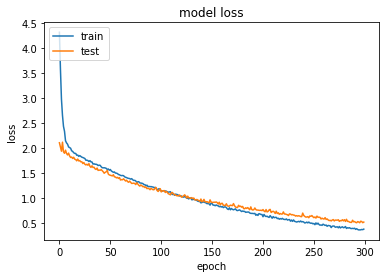

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

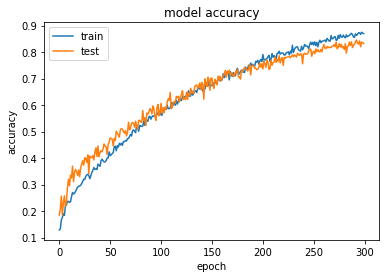

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict_classes(x_testcnn)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
new_Ytest = y_test.astype(int)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.40      0.56        68
           1       0.83      0.97      0.90       142
           2       0.81      0.89      0.85       108
           3       0.80      0.78      0.79       132
           4       0.79      0.91      0.85       127
           5       0.86      0.88      0.87       112
           6       0.83      0.80      0.82       136
           7       0.89      0.83      0.86       126

    accuracy                           0.83       951
   macro avg       0.85      0.81      0.81       951
weighted avg       0.84      0.83      0.83       951



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[ 27  17   1  15   1   0   7   0]
 [  1 138   0   3   0   0   0   0]
 [  0   0  96   4   5   1   0   2]
 [  0   4   5 103   5  10   2   3]
 [  0   1   1   0 116   2   5   2]
 [  0   0   9   2   2  98   1   0]
 [  0   4   0   2  12   3 109   6]
 [  0   2   6   0   6   0   7 105]]


In [ ]:
model.save('testing_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [ ]:
new_model=keras.models.load_model('/content/testing01_model.h5')
new_model.summary()

OSError: ignored

In [ ]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

30/30 [==============================] - 0s 4ms/step - loss: 0.5971 - accuracy: 0.8275
Restored model, accuracy: 82.75%


In [ ]:

"""
This file can be used to try a live prediction. 
"""

import keras
import numpy as np
import librosa

class livePredictions:
    """
    Main class of the application.
    """

    def __init__(self, path, file):
        """
        Init method is used to initialize the main parameters.
        """
        self.path = path
        self.file = file

    def load_model(self):
        """
        Method to load the chosen model.
        :param path: path to your h5 model.
        :return: summary of the model with the .summary() function.
        """
        self.loaded_model = keras.models.load_model(self.path)
        return self.loaded_model.summary()

    def makepredictions(self):
        """
        Method to process the files and create your features.
        """
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=1)
        x = np.expand_dims(x, axis=0)
        predictions = self.loaded_model.predict_classes(x)
        print("Prediction is", " ", self.convertclasstoemotion(predictions))

    @staticmethod
    def convertclasstoemotion(pred):
        """
        Method to convert the predictions (int) into human readable strings.
        """
        
        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label

# Here you can replace path and file with the path of your model and of the file 
#from the RAVDESS dataset you want to use for the prediction,

pred = livePredictions(path='/content/drive/MyDrive/testing01_model.h5',file='/content/drive/MyDrive/SpeechEmotionReco/2021-04-30T06_48_17.698Z.wav')

pred.load_model()
pred.makepredictions()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 40, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
